# Breast Cancer Detection using Linear Model
_Build a machine learning model to detect breast cancer using a linear model._

In [50]:
# Imports required packages

import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

## Retrieving the Data

Loads the wisconsin breast cancer dataset for classification. Additional information about this dataset can be retrieved from original source at https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic.

In [12]:
# Fetches the data set and caches it

# NOTE: This step may take several seconds to complete as it downloads 
# the data from web and then caches it locally

data, target = load_breast_cancer(return_X_y=True, as_frame=True)

## Exploratory Data Analysis (EDA)

In [22]:
# Shows the dataset
display(data)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
# Prints the basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [26]:
# Similarly, finds the shape of the target
target.shape

(569,)

In [21]:
# Finds the class distribution
target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

Target `1` and `0` represent benign and malignant status, respectively.

In [30]:
# Shows the basic stastics about the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Modeling

In [32]:
# Split the data set into train and test set with stratification
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42, stratify=target)

### Stochastic Gradient Descent Classifier

In [36]:
# Initialize the classifier (with default parameters)
# NOTE: This step may take several seconds to complete
sgd_clf = SGDClassifier(n_jobs=-1, random_state=42)

# Fits the model on the train set
sgd_clf.fit(X_train, y_train)

SGDClassifier(n_jobs=-1, random_state=42)

**Measuring Out-of-Sample Accuracy Score**

In [39]:
sgd_clf_predictions_train = sgd_clf.predict(X_train)
sgd_clf_accuracy_train = accuracy_score(y_train, sgd_clf_predictions_train)

sgd_clf_predictions_test = sgd_clf.predict(X_test)
sgd_clf_accuracy_test = accuracy_score(y_test, sgd_clf_predictions_test)

print("SGD Classifier Accuracy: \n{:.1f}% [Train], \n{:.1f}% [Test]".format(
    sgd_clf_accuracy_train * 100, sgd_clf_accuracy_test * 100))

SGD Classifier Accuracy: 
91.4% [Train], 
93.9% [Test]


### Support Vector Classifier

In [41]:
# Initializes SVM classifier
svm_clf = SVC(random_state=42)

# Fits the model with train set
# NOTE: This step may take several minutes to complete
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [42]:
svm_clf_predictions_train = svm_clf.predict(X_train)
svm_clf_accuracy_train = accuracy_score(y_train, svm_clf_predictions_train)

svm_clf_predictions_test = svm_clf.predict(X_test)
svm_clf_accuracy_test = accuracy_score(y_test, svm_clf_predictions_test)

print("SVM Classifier Accuracy: \n{:.1f}% [Train], \n{:.1f}% [Test]".format(
    svm_clf_accuracy_train * 100, svm_clf_accuracy_test * 100))

SVM Classifier Accuracy: 
91.9% [Train], 
93.0% [Test]


## Error Analysis

As all the attributes are of different scales, these are first scaled before error analysis.

In [45]:
# Instantiate scaler object
std_scaler = StandardScaler()

# Scales the feature values
X_train_scaled = std_scaler.fit_transform(X_train)

In [48]:
# Initializes the classifier (with default parameters)
sgd_clf = SGDClassifier(n_jobs=-1, random_state=42)

# Performs cross-validation predictions
# NOTE: This step may take several minutes to complete
cv_predictions = cross_val_predict(
    sgd_clf, X_train_scaled, y_train, cv=5, n_jobs=-1, verbose=3, method="predict")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


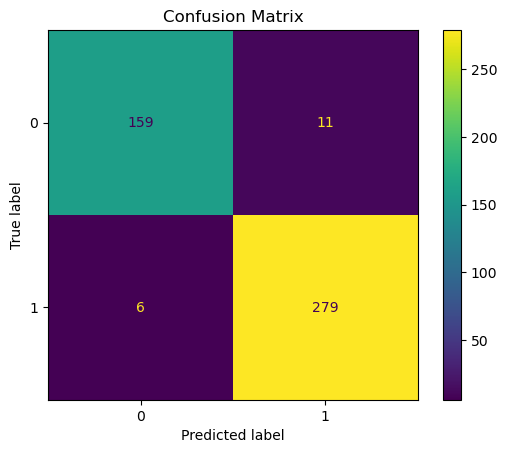

In [51]:
# Plots the confusion matrix

ConfusionMatrixDisplay.from_predictions(y_train, cv_predictions)

plt.title("Confusion Matrix")
plt.show()

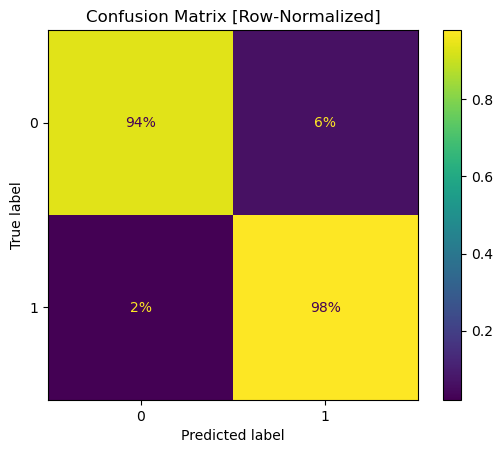

In [52]:
# Plots the normalized confusion matrix by dividing each value by the total number of images in the
# corresponding (true) class (i.e., divide by the row’s sum).
    
ConfusionMatrixDisplay.from_predictions(y_train, cv_predictions, normalize="true", values_format=".0%")

plt.title("Confusion Matrix [Row-Normalized]")
plt.show()

Observations from the above (normalized) confusion matrix as are follows.
- 6% (11) instances were detected as benign (false-negative)
- 2% (6) instances were detected as malignant (false-position)